In [1]:
from os.path import join
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

import h5py
try:
    import GSHEWaveform
except ModuleNotFoundError:
    import sys
    sys.path.append("../")
    import GSHEWaveform
import utils
from glob import glob
%load_ext autoreload
%autoreload 2

import astropy.units as u
import astropy.constants as c

In [2]:
%matplotlib inline

## $\beta/M$ plots

$\lambda_{\rm eff}$ in meters

**WHAT DOES p5 MEAN, WHY DOES IT GIVE STRANGE PARAMETERS!**

In [3]:
loaddir = "/Users/stiskalek/Data/gshe_liv_alpha0/"

loaddir = '/home/miguel/code/notebooks/gw_data/liv_alpha0/'
#loaddir = '/home/miguel/Dropbox/Projects/AGN_strong_field_lensing_birefringence/liv_alpha0/'

files, names_all = utils.get_liv_fnames(loaddir)
print(files)
#files[has('plus')]

['liv_S200224ca_Aplus_alpha0.h5', 'liv_S190814bv_Aminus_alpha0.h5', 'liv_S190814bv_Aplus_alpha0.h5', 'liv_S191216ap_Aminus_alpha0.h5', 'liv_S200219ac_Aplus_alpha0.h5', 'liv_S190828l_Aplus_alpha0.h5', 'liv_S190924h_Aplus_alpha0.h5', 'liv_S200129m_Aminus_alpha0.h5', 'liv_S190828l_Aminus_alpha0.h5', 'liv_S200129m_Aplus_alpha0.h5', 'liv_S200208q_Aminus_alpha0.h5', 'liv_S200202ac_Aminus_alpha0.h5', 'liv_S191204r_Aplus_alpha0.h5', 'liv_S200311bg_Aminus_alpha0.h5', 'liv_S200202ac_Aplus_alpha0.h5', 'liv_S190727h_Aminus_alpha0.h5', 'liv_S200225q_Aminus_alpha0.h5', 'liv_S190915ak_Aplus_alpha0.h5', 'liv_S190910s_Aminus_alpha0.h5', 'liv_S200219ac_Aminus_alpha0.h5', 'liv_S191215w_Aminus_alpha0.h5', 'liv_S200224ca_Aminus_alpha0.h5', 'liv_S191215w_Aplus_alpha0.h5', 'liv_S200208q_Aplus_alpha0.h5', 'liv_S190707q_Aminus_alpha0.h5', 'liv_S191129u_Aplus_alpha0.h5', 'liv_S190707q_Aplus_alpha0.h5', 'liv_S190828j_Aplus_alpha0.h5', 'liv_S200311bg_Aplus_alpha0.h5', 'liv_S191222n_Aplus_alpha0.h5', 'liv_S191129u

In [4]:
d = h5py.File(loaddir+'liv_S190814bv_Aplus_alpha0.h5','r')
print(d.keys())
print(d['Aplus_alpha0'].keys())
print(d['Aplus_alpha0']['config_file'].keys())

<KeysViewHDF5 ['Aplus_alpha0', 'version']>
<KeysViewHDF5 ['approximant', 'calibration_envelope', 'config_file', 'injection_data', 'meta_data', 'posterior_samples', 'priors', 'psds', 'version']>
<KeysViewHDF5 ['analysis', 'bayeswave', 'condor', 'data', 'datafind', 'engine', 'input', 'lalinference', 'ligo-skymap-from-samples', 'ligo-skymap-plot', 'mpi', 'paths', 'ppanalysis', 'resultspage', 'singularity', 'skyarea', 'statevector']>


In [5]:
print(d['Aplus_alpha0']['config_file'].keys())
s = np.copy(d['Aplus_alpha0']['posterior_samples'])

s['luminosity_distance']*10**s["log10lambda_eff"]

<KeysViewHDF5 ['analysis', 'bayeswave', 'condor', 'data', 'datafind', 'engine', 'input', 'lalinference', 'ligo-skymap-from-samples', 'ligo-skymap-plot', 'mpi', 'paths', 'ppanalysis', 'resultspage', 'singularity', 'skyarea', 'statevector']>


array([1.24605769e+22, 1.04829540e+20, 5.31716382e+26, ...,
       5.58350068e+25, 1.82240814e+26, 6.04349073e+18])

Text(0.5, 1.0, 'who would do this to their data?')

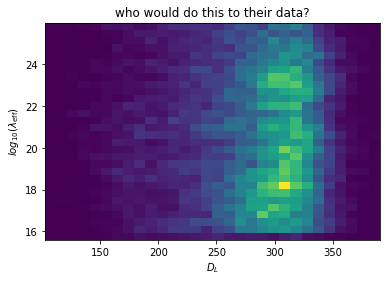

In [6]:
plt.hist2d(s['luminosity_distance'],s['log10lambda_eff'],[30,30])
plt.xlabel(r'$D_L$')
plt.ylabel(r'$log_{10}(\lambda_{\rm eff})$')
plt.title('who would do this to their data?')

In [7]:
l_eff = 10**s['log10lambda_eff']
l_eff_typical = np.quantile(l_eff,0.05)*u.m
DL_typical = np.median(s["luminosity_distance"])*u.Mpc
A0_typical = ((c.h*c.c/(l_eff_typical)).to(u.eV))**2
A0_typical

<Quantity 2.55398007e-45 eV2>

In [8]:
#beta_4 = (1e4GM_sun) A0 D_L

def beta_from_chains(samples, M=1e4):
    ''' return posteriors for beta
        s -> chains
        M -> central BH mass
    '''

    A0 = GSHEWaveform.A0_from_sample(
            10**samples["log10lambda_eff"], samples["redshift"],
            samples["luminosity_distance"])*(u.peV/(c.c*c.h))**2
    return (M*samples['luminosity_distance']*u.Mpc*A0*(c.G*u.Msun/c.c**2)).decompose()

beta_4 = beta_from_chains(s)
np.quantile(beta_4,0.9)

<Quantity 0.02635937>

In [9]:
print('beta /GM')
((A0_typical*(DL_typical)/c.c**1/c.h**2)).decompose()

beta /GM


<Quantity 4.54499517 1 / s>

In [10]:
print('beta max (M/1e4 Msun)')
(1e4*A0_typical*(DL_typical)/c.c**2/c.h**2*c.G*u.solMass/c.c**2).decompose()

beta max (M/1e4 Msun)


<Quantity 0.22386333>

In [11]:
print('beta/GM max (dimensionless)')
((A0_typical*(DL_typical))*c.G/c.c**6).decompose()

beta/GM max (dimensionless)


<Quantity 5.4998101e-119 kg m2>

In [12]:
((c.h*c.c/(l_eff_typical*u.m))/u.eV).decompose()

<Quantity 5.05369179e-23 1 / m>

In [13]:
#combine plots
d_both = [h5py.File(loaddir+'liv_S190814bv_A'+x+'_alpha0.h5','r') for x in ['minus','plus']]

sm, sp = [np.copy(d_both[i]['A'+s+'_alpha0']['posterior_samples']) for i,s in enumerate(['min','plus'])]

bt4_m, bt4_p = -beta_from_chains(sm), beta_from_chains(sp)

# #extract the extrema
# limit = 0.
# low = np.quantile(bt4_m,limit)
# hi = np.quantile(bt4_p,1-limit)
#bt4 = np.concatenate((bt4_m[bt4_m>low],bt4_p[bt4_p<hi]))
bt4 = np.concatenate((bt4_m,bt4_p))
bt4[0]

<Quantity -7.65760383e-09>

In [14]:
np.quantile(bt4,[.05,.95])
#plt.hist(np.abs(bt4_m),bt4_p)

<Quantity [-0.00728265,  0.03232838]>

In [15]:
import seaborn as sns
from matplotlib import ticker as mticker

In [16]:
bt4.mean(), bt4.std()

(<Quantity -0.02279851>, <Quantity 0.52715033>)

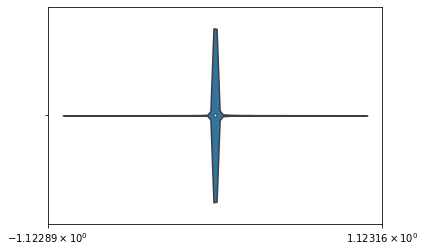

In [17]:
fig, ax = plt.subplots()

bt4_new = bt4[np.abs(bt4)<1]

#low,hi = np.quantile(bt4,[0.05,0.95])
#bt4_new = bt4[np.where(bt4>low and bt4<hi)]

sns.violinplot([bt4_new],showmeans=False, vert=True, showextrema=False,quantiles=[[0.05,.95] for i in [1]],widths=1,s=3,ax=ax)

ax.set_xscale('symlog')
# ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
# ymin, ymax = ax.get_xlim()
# tick_range = np.arange(np.floor(ymin), ymax,10)
# ax.xaxis.set_ticks(tick_range)
# ax.xaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
# plt.tight_layout()
plt.show()

## Violin plots

In [18]:
#importlib.reload(utils)

beta_over_M_raw = []

names = []
file_names = []
for i, file in enumerate(files):
    btOm = utils.beta_over_M_from_liv_samples(join(loaddir, file))
    if btOm is not None:
        beta_over_M_raw.append(btOm)
        names.append(names_all[i])
        file_names.append(file)



sort = np.argsort(names)
names = [names[i] for i in sort]
file_names = [file_names[i] for i in sort]
beta_over_M_raw = [beta_over_M_raw[i] for i in sort]

#print(beta_over_M)

In [19]:
#print(beta_over_M)
from astropy import units as u
from astropy import constants as c
(u.Mpc*u.peV**2).decompose()

Unit("7.92084e-40 kg2 m5 / s4")

**Notes:**
* 90% and 95\% quantiles are very different!

In [30]:
d = h5py.File(loaddir+'liv_S191129u_Aminus_alpha0.h5','r')

In [48]:
print(d['liv_S191129u_Aminus_dalpha0'].keys())
d['liv_S191129u_Aminus_dalpha0']['posterior_samples']['redshift']

<KeysViewHDF5 ['approximant', 'calibration_envelope', 'config_file', 'injection_data', 'meta_data', 'posterior_samples', 'priors', 'psds', 'version']>


array([0.11868498, 0.17521545, 0.1863183 , ..., 0.0964934 , 0.1713799 ,
       0.09595908])

In [27]:
master_dict = {n:[-1,-1] for n in names}
sign = ['+' if 'plus' in f else '-' for f in file_names]
for i,n in enumerate(names):
    if sign[i] == '-':
        master_dict[n][0]=i
    if sign[i] == '+':
        master_dict[n][1]=i

# for n in master_dict:
#     if -1 in master_dict[n]:
#         del(master_dict[n])
del(master_dict['S190630ag'])
master_dict

{'S190706ai': [2, 1],
 'S190707q': [3, 4],
 'S190708ap': [6, 5],
 'S190720a': [8, 7],
 'S190727h': [9, 10],
 'S190728q': [11, 12],
 'S190814bv': [13, 14],
 'S190828j': [15, 16],
 'S190910s': [17, 18],
 'S190915ak': [19, 20],
 'S190924h': [22, 21],
 'S191129u': [23, 24],
 'S191204r': [25, 26],
 'S191215w': [28, 27],
 'S191216ap': [29, 30],
 'S191222n': [31, 32],
 'S200129m': [34, 33],
 'S200208q': [36, 35],
 'S200219ac': [37, 38],
 'S200224ca': [39, 40],
 'S200225q': [41, 42],
 'S200311bg': [44, 43]}

In [47]:
from GSHEWaveform import forecast as fc

In [74]:
factor = (u.peV**2*u.Mpc/c.c**2/c.h**2*c.G*u.solMass/c.c**2).decompose()
beta_1Msun = [bt*float(factor) for bt in beta_over_M_raw]
scale = 1e4
sign = ['+' if 'plus' in f else '-' for f in file_names]

print('comparing with 90% cl with mismatch for SNR_factor=1')


print('Event \t\t sign \t beta (chains) \t beta (mismatch) \t chains/mismatch')

for i,name in enumerate(file_names):
    d = h5py.File(loaddir+name,'r')
#     print(d.keys())
    
    keys = list(d.keys())
    key = keys['Aminus' in keys or 'Aplus' in keys]
    if not 'posterior_samples' in d[key].keys():
        key = keys[1]
#     if 'posterior_samples' in d[key].keys():
    poster = np.copy(d[key]['posterior_samples'])
#     dL = np.quantile(poster['luminosity_distance'],[0.05,0.5,.95])    
    Mtot = np.quantile(poster['mass_1']+poster['mass_2'],[0.05,0.5,.95])
    
    #compute beta from the mismatch
    q = np.quantile(poster['mass_ratio'],[0.05,0.5,.95])
    z = np.quantile(poster['redshift'],[0.05,0.5,0.95])
    beta_mismatch = fc.beta_min(Mtot[1], z[1], q[1], SNR_factor = 1,
             M_fid = 1e4, bt_fid = 0.1)

    
    s = 1 if sign[i] == '+' else -1
    bt = beta_1Msun[i]
    bt_chain = (np.quantile(scale*bt,0.9))
#     print(names[i],'\t %f'%(dL[1]), '\t %f'%(Mtot[1]), '\t %e'%(s*np.quantile(scale*bt,0.9)))
    print(names[i],'\t', sign[i],'\t %e'%bt_chain,'\t %e'%(beta_mismatch),'\t\t %.3g'%(bt_chain/beta_mismatch))

    
#     else:
#         key = keys[1]
#         print(name, d[key].keys())


comparing with 90% cl with mismatch for SNR_factor=1
Event 		 sign 	 beta (chains) 	 beta (mismatch) 	 chains/mismatch
S190630ag 	 - 	 2.416765e-02 	 3.160420e-02 		 0.765
S190706ai 	 + 	 2.654872e-01 	 1.520962e-01 		 1.75
S190706ai 	 - 	 2.351810e-02 	 1.541049e-01 		 0.153
S190707q 	 - 	 1.519931e+00 	 4.560523e-02 		 33.3
S190707q 	 + 	 2.948434e-02 	 4.474256e-02 		 0.659
S190708ap 	 + 	 3.735109e-02 	 3.880040e-02 		 0.963
S190708ap 	 - 	 1.657553e-01 	 3.879162e-02 		 4.27
S190720a 	 + 	 6.622339e-02 	 4.406920e-02 		 1.5
S190720a 	 - 	 6.780800e-02 	 4.410441e-02 		 1.54
S190727h 	 - 	 4.235074e-02 	 7.595387e-02 		 0.558
S190727h 	 + 	 3.477655e-02 	 7.514608e-02 		 0.463
S190728q 	 - 	 4.788154e-02 	 5.197938e-02 		 0.921
S190728q 	 + 	 7.807855e-02 	 5.173242e-02 		 1.51
S190814bv 	 - 	 1.000925e-02 	 3.108911e-02 		 0.322
S190814bv 	 + 	 2.635937e-02 	 3.104442e-02 		 0.849
S190828j 	 - 	 9.368852e-02 	 5.978151e-02 		 1.57
S190828j 	 + 	 1.539801e-02 	 5.952025e-02 		 0.25

In [79]:
from importlib import reload
reload(fc)

<module 'GSHEWaveform.forecast' from '/home/miguel/code/GSHE/scripts/../GSHEWaveform/forecast.py'>

In [91]:
print([fc.beta_min(Mtot[1], z[1], q[1], SNR_factor = 1,
             M_fid = 1e4, bt_fid = 0.1,fmin=f,psd_fun=fc.psd_ET) for f in [1,10]])

[fc.beta_min(Mtot[1], z[1], q[1], SNR_factor = 1,
             M_fid = 1e4, bt_fid = 0.1,fmin=f,psd_fun=fc.psd_CE) for f in [1,10]]

[array(0.00073186), array(0.00202483)]


[array(0.00154885), array(0.00158679)]

In [ ]:
factor = (u.peV**2*u.Mpc/c.c**2/c.h**2*c.G*u.solMass/c.c**2).decompose()
beta_1Msun = [bt*float(factor) for bt in beta_over_M_raw]
scale = 1e4
sign = ['+' if 'plus' in f else '-' for f in file_names]


print('Event \t\t DL [Mpc] \t Mtot [Msun] \t beta [10^4Modot]')

for i,name in enumerate(file_names):
    d = h5py.File(loaddir+name,'r')
#     print(d.keys())
    
    keys = list(d.keys())
    key = keys['Aminus' in keys or 'Aplus' in keys]
    if not 'posterior_samples' in d[key].keys():
        key = keys[1]
#     if 'posterior_samples' in d[key].keys():
    poster = np.copy(d[key]['posterior_samples'])
    dL = np.quantile(poster['luminosity_distance'],[0.05,0.5,.95])    
    Mtot = np.quantile(poster['mass_1']+poster['mass_2'],[0.05,0.5,.95])
    
    #compute beta from the mismatch
    q = np.quantile(poster['mass_ratio'],[0.05,0.5,.95])
    z = np.quantile(poster['redshift'],[0.05,0.5,0.95])
    beta_mismatch = fc.beta_min(Mtot[1], z[1], q[1], SNR_factor = 0.32694,
             M_fid = 1e4, bt_fid = 0.1)

    
    s = 1 if sign[i] == '+' else -1
    bt = beta_1Msun[i]
    print(names[i],'\t %f'%(dL[1]), '\t %f'%(Mtot[1]), '\t %e'%(s*np.quantile(scale*bt,0.9)))
    print(names[i],'\t', sign[i],'\t %e'%(np.quantile(scale*bt,0.9)),'\t %e'%(beta_mismatch))

0.10162410057263678


In [63]:
factor = (u.peV**2*u.Mpc/c.c**2/c.h**2*c.G*u.solMass/c.c**2).decompose()

beta_1Msun = [bt*float(factor) for bt in beta_over_M_raw]

scale = 1e4

sign = ['+' if 'plus' in f else '-' for f in file_names]



names = np.array(names)

colors = ['b' if 'plus' in f else 'r' for f in file_names]

#axis =  [1 if 'plus' in f else 0 for f in file_names]

iplus = [i for i in range(len(file_names)) if 'plus' in file_names[i]]
iminus = [i for i in range(len(file_names)) if 'minus' in file_names[i]]






for i, bt in enumerate(beta_1Msun):
    s = 1 if sign[i] == '+' else -1
    print('%s \t%e'%(names[i], s*np.quantile(scale*bt,0.9)))


S190630ag 	-2.416765e-02
S190706ai 	2.654872e-01
S190706ai 	-2.351810e-02
S190707q 	-1.519931e+00
S190707q 	2.948434e-02
S190708ap 	3.735109e-02
S190708ap 	-1.657553e-01
S190720a 	6.622339e-02
S190720a 	-6.780800e-02
S190727h 	-4.235074e-02
S190727h 	3.477655e-02
S190728q 	-4.788154e-02
S190728q 	7.807855e-02
S190814bv 	-1.000925e-02
S190814bv 	2.635937e-02
S190828j 	-9.368852e-02
S190828j 	1.539801e-02
S190910s 	-7.498524e-02
S190910s 	9.275898e-03
S190915ak 	-8.571662e-02
S190915ak 	1.668573e-02
S190924h 	1.166461e+00
S190924h 	-3.652031e-02
S191129u 	-9.882861e-02
S191129u 	1.185500e-01
S191204r 	-1.017965e-02
S191204r 	3.196849e-02
S191215w 	1.368592e-02
S191215w 	-8.119953e-02
S191216ap 	-1.215664e-02
S191216ap 	2.963064e-01
S191222n 	-8.828158e-02
S191222n 	1.351822e-02
S200129m 	1.148064e-01
S200129m 	-9.219537e-03
S200208q 	1.576631e-02
S200208q 	-3.807473e-02
S200219ac 	-8.014419e-01
S200219ac 	1.366864e-02
S200224ca 	-3.653790e-02
S200224ca 	1.604960e-02
S200225q 	-3.375023e+

In [33]:
np.array(beta_over_M_raw)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (45,) + inhomogeneous part.

In [30]:
plt.figure(figsize=(9 * 0.75, 9))

#Coefficient from our long paper, eq 4.5
#assumes: luminosity_distance in Mpc, A0 = our c0 and is in ev^2
#NOTE: A0 in peV^2 to eV^2 
#beta_over_M = [bt*(1e-12)**2/(1e-23)**2/1e3*0.148/(5e4) for bt in beta_over_M_raw]

factor = (u.peV**2*u.Mpc/c.c**2/c.h**2*c.G*u.solMass/c.c**2).decompose()

beta_1Msun = np.array([bt*float(factor) for bt in beta_over_M_raw])

colors = ['b' if 'plus' in f else 'r' for f in file_names]
sign = ['+' if 'plus' in f else '-' for f in file_names]

scale = 1e4
#beta_p = [b for]

plt.violinplot(np.abs(beta_1Msun)*scale, showmeans=False, vert=False, showextrema=False, widths=1,quantiles=[[.9] for b in beta_1Msun])#,color=colors)
yticks = np.arange(1, len(names) + 1)
plt.yticks(yticks, [nam+' '+sign[i] for i,nam in enumerate(names)])
plt.xlim(0, 2e-4*scale)
#plt.xscale('log')

plt.xlabel(r"$10^4\beta(M/M_\odot)$")
plt.tight_layout()
#plt.savefig("/Users/stiskalek/Downloads/A0s.png", dpi=450)
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (45,) + inhomogeneous part.

<Figure size 486x648 with 0 Axes>

In [ ]:
iplus = [i for i in range(len(file_names)) if 'plus' in file_names[i]]

beta_1Msun[iplus]

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (45,) + inhomogeneous part.

<Figure size 162x2592 with 0 Axes>

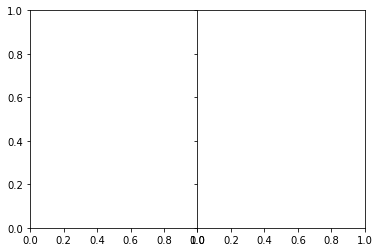

In [46]:
plt.figure(figsize=(3 * 0.75, 3*12))

fig,ax = plt.subplots(1,2,sharey=True)
plt.subplots_adjust(wspace=0.0)

#Coefficient from our long paper, eq 4.5
#assumes: luminosity_distance in Mpc, A0 = our c0 and is in ev^2
#NOTE: A0 in peV^2 to eV^2 
#beta_over_M = [bt*(1e-12)**2/(1e-23)**2/1e3*0.148/(5e4) for bt in beta_over_M_raw]

factor = (u.peV**2*u.Mpc/c.c**2/c.h**2*c.G*u.solMass/c.c**2).decompose()

beta_1Msun = np.array([bt*float(factor) for bt in beta_over_M_raw])

names = np.array(names)

colors = ['b' if 'plus' in f else 'r' for f in file_names]

#axis =  [1 if 'plus' in f else 0 for f in file_names]

iplus = [i for i in range(len(file_names)) if 'plus' in file_names[i]]
iminus = [i for i in range(len(file_names)) if 'minus' in file_names[i]]

sign = ['+' if 'plus' in f else '-' for f in file_names]

scale = 1e4
#beta_p = [b for]


ax[0].violinplot(-np.abs(beta_1Msun[iminus])*scale, showmeans=False, vert=False, showextrema=False, widths=1,quantiles=[[.1] for b in beta_1Msun[iminus]])#,color=colors)

ax[1].violinplot(np.abs(beta_1Msun[iplus])*scale, showmeans=False, vert=False, showextrema=False, widths=1,quantiles=[[.9] for b in beta_1Msun[iplus]])#,color=colors)

yticks = np.arange(1, len(names[iminus]) + 1)
plt.yticks(yticks, [nam for i,nam in enumerate(names[iminus])])
ax[1].axes.yaxis.set_visible(False)
ax[0].set_xlim(-2e-4*scale,0)
ax[1].set_xlim(1e-5, 1.5e-4*scale)
#plt.xscplusale('symlog')


fig.text(0.5,0.01,r"$10^4\beta(M/M_\odot)$",ha='center')
#plt.tight_layout()
#plt.savefig("/Users/stiskalek/Downloads/A0s.png", dpi=450)
plt.show()

([<matplotlib.axis.YTick at 0x7fcf030b6460>,
 [Text(0, 0, 'S190630ag'),
  Text(0, 0, 'S190706ai'),
  Text(0, 0, 'S190707q'),
  Text(0, 0, 'S190708ap'),
  Text(0, 0, 'S190720a'),
  Text(0, 0, 'S190727h'),
  Text(0, 0, 'S190728q'),
  Text(0, 0, 'S190814bv'),
  Text(0, 0, 'S190828j'),
  Text(0, 0, 'S190910s'),
  Text(0, 0, 'S190915ak'),
  Text(0, 0, 'S190924h')])

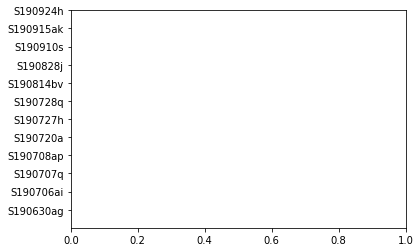

In [385]:
yticks = np.arange(1, len(names[iminus]) + 1)
plt.yticks(yticks, [nam for i,nam in enumerate(names[iminus])])

In [342]:
file_names[[2,1]]

array(['liv_S190706ai_Aplus_alpha0.h5', 'liv_S190706ai_Aminus_alpha0.h5'],
      dtype='<U30')

## Constraints

For a given event, the probaility of detecting GSHE is given by

$$p_i= f(M,r_{\rm src}) P_{\rm GSHE}(\beta_{\rm ex}^{i}(M),r_{\rm src}) = f(M,r_{\rm src}) $$

$f$ is the fraction of mergers at a given radius of a BH of a given mass. The second factor is the probability of detecting GSHE, which we take as given by $\frac{1}{2}\Upsilon(\beta_{\rm ex}^i(M),r_{\rm src})$, where $\beta_{\rm ex}^i(M)$ is the maximum allowed value of $\beta$ given by the data (coefficient reflects that $\Upsilon$ only counts the half sphere).

**NOTES**
* $\checkmark$ parameterize $\Upsilon \propto \beta_{\rm min}^{-2/3}$ for $\beta<1$
* Include measurement uncertainty in $\beta$ $\to$ integrate against (cumulative) posterior?
* need to consider positive and negative beta
* could integrate up to a certain radius of the source (i.e. fraction of events for $r<XX$)
 

The probability of non-detection should be $\prod_i (1-p_i)$, generalized to $P(U,D,\vec p)=\prod_u(1-p_u)\prod_d p_d$ for $D$ detected events and $U$ undetected ones. When $p_i\ll 1 \Rightarrow (1-p_i)\approx e^{-p_i}$ and we recover a Poisson distribution.

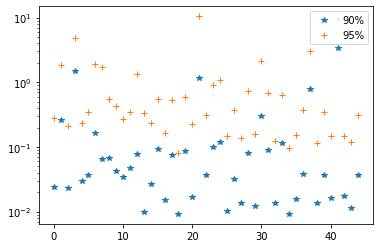

In [45]:
bt90 = np.array([np.percentile(bt,90) for bt in beta_1Msun])
bt95 = np.array([np.percentile(bt,95) for bt in beta_1Msun])

plt.semilogy(bt90*1e4,'*',label='90%')
plt.semilogy(bt95*1e4,'+',label='95%')

plt.legend()

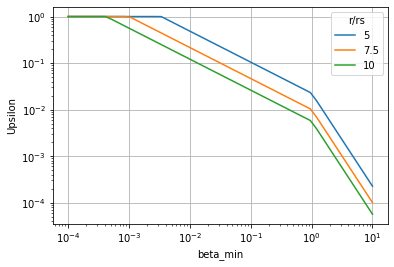

In [74]:
def Upsilon(bt_min,r_src,n0=-2/3.,n1=-2,bt_cut = np.infty):
    '''fraction of events with bt>bt_min
        r_src = distance in r_s
        approximated by min(1,A*bt_min^n0) (for bt_min <1)
                            A*bt_min^n1 (bt_min>1)
                        0 for bt_min>bt_cut ->TODO: replace by B_bt_min^-n1
                        
        TODO: coefficient computed by hand noticing that Upsilon(bt=1,r=7.5) = 1e-2
    '''
    A = 1e-2 #amplitude at bt_min = 1, r=7.5
    Ups = np.where(bt_min<1,A*(bt_min/1)**n0, A*(bt_min/1)**n1)*(7.5/r_src)**2
    Ups[Ups>=1] = 1
    Ups[bt_min>bt_cut] = 0
    
    return Ups

vUpsilon = np.vectorize(Upsilon)

bt_min = np.geomspace(1e-4,1e1)
for  rs in [5,7.5,10]:
    plt.loglog(bt_min,Upsilon(bt_min,rs,bt_cut=10),label=rs)
    
plt.legend(title='r/rs')
plt.xlabel('beta_min')
plt.ylabel('Upsilon')
plt.grid()

In [67]:
def P_undetected(bt_max,f,M,r_src):
    '''probability of non-detection, multiplying individual calculations
       bt_max = limit to observations, for 1 solar mass
       M = mass [Msun]
       r = source radius [rs]
       f = fraction of events
    '''
    ups = Upsilon(bt_max*M, r_src)
    pi = (1-0.5*ups*f) #TODO: extend upsilon to total probability
    Ptot = np.prod(pi)#np.exp(np.sum(np.log(pi)))
    return Ptot

vP_undetected = np.vectorize(P_undetected)

def rate_poisson(bt_max,M,r_src, bt_cut=np.infty):
    '''
       returns \sum_i 0.5 Upsilon(bt_max*M, r_src) = f^-1 log(L_poisson)
       poisson approximation for the probability (useful to solve for f)
    '''
    ups = Upsilon(bt_max*M, r_src,bt_cut=bt_cut)
    return 0.5*np.sum(ups)

v_rate_poisson=np.vectorize(rate_poisson)

In [68]:
M,r=1e6,5
rate_90 = np.abs(np.log(0.1))
f = rate_90/rate_poisson(bt90,M,r)
print(f), print(len(bt90))

52.76360962015129
23


(None, None)

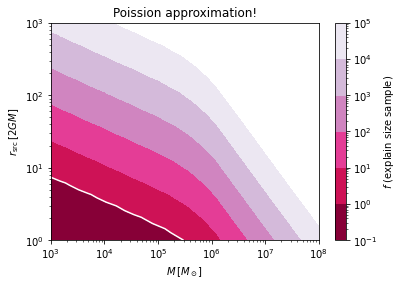

In [72]:
Masses = np.logspace(3,8,30)
radii = np.geomspace(1,1e3,20)

import matplotlib.colors as colors

X,Y = np.meshgrid(Masses,radii)

#Factor 0.5 bc of double counting!
Z = np.array([[2*rate_90/rate_poisson(bt90,M,r,bt_cut=np.infty) for M in Masses] for r in radii])

c= plt.contourf(X,Y,Z,np.logspace(-1,5,7), norm=colors.LogNorm(),cmap='PuRd_r')#,cmap='inferno_r')
c2 = plt.contour(X,Y,Z,[1],colors='w')
plt.colorbar(c,label=r'$f$ (explain size sample)')

plt.xscale('log')
#plt.yscale('symlog',linthreshy=10)
plt.yscale('log')
plt.xlabel(r'$M \, [M_\odot]$')
plt.ylabel(r'$r_{\rm src} \, [2GM]$')
plt.title('Poission approximation!')
plt.show()

Text(0.5, 1.0, 'M=1.0e+04, r=5')

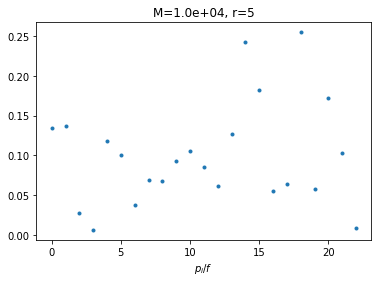

In [51]:
M=1e4
r = 5
ups = Upsilon(bt90*M,r)

#plt.scatter(bt90*M,ups)
plt.plot(0.5*ups,'.')

plt.xlabel(r'$p_i/f$')
plt.title('M=%.1e, r=%g'%(M,r))

#def Rate(bt_limits, M, r_src):
    

Text(0.5, 1.0, 'M=1.00e+04 M_sun (preliminary!)')

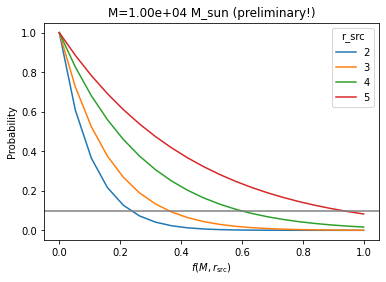

In [52]:
fs = np.linspace(0,1,20)

M=1e4

for r_src in [2,3,4,5]:
#r_src=5

    Ps = np.array([P_undetected(bt90,f,M,r_src) for f in fs])
    plt.plot(fs,Ps,label=r_src)
    
plt.legend(title='r_src')
plt.axhline(0.1,color='gray')
plt.xlabel(r'$f(M,r_{\rm src})$')
plt.ylabel('Probability')
plt.title('M=%.2e M_sun (preliminary!)'%M)

In [ ]:
def rate(beta_lim, M, r_src):
    P_vect =  0.5*ups(beta_lim*M,r_src)
    rate = np.

## $A_0$ plots

In [48]:
A0s = []

names = []
file_names =[]
for i, file in enumerate(files):
    A0 = utils.A0_from_liv_samples(join(loaddir, file))
    if A0 is not None:
        A0s.append(A0 * 1e20)
        names.append(names_all[i])
        file_names.append(file)



sort = np.argsort(names)
names = [names[i] for i in sort]
A0s = [A0s[i] for i in sort]
file_names = [file_names[i] for i in sort]

print(A0s)

[array([2.97419674e-18, 1.02519884e-04, 1.80215789e-12, ...,
       5.24229898e-16, 8.16633325e-20, 5.35169212e-09]), array([1.88698935e-13, 1.16064249e-19, 1.24887466e-18, ...,
       9.48575958e-07, 6.72566760e-09, 1.52539346e-13]), array([8.71279935e-14, 2.05850009e-19, 8.18122981e-06, ...,
       8.38579612e-18, 7.57799475e-09, 1.71554687e-18]), array([1.48367233e-11, 9.36446431e-03, 1.64083278e-09, ...,
       1.01819035e-15, 1.82981716e-07, 1.75128325e-03]), array([5.61355514e-01, 4.62553557e-17, 1.00299593e-12, ...,
       1.27441878e-06, 3.04635762e-17, 2.40629441e-15]), array([7.46857362e-07, 8.74882193e-04, 1.33851920e-11, ...,
       1.16173120e-16, 9.32413498e-17, 1.79325763e-11]), array([1.41370110e-15, 1.09133073e-11, 7.98384648e-14, ...,
       1.94034969e+00, 3.71875867e-12, 2.52371738e-05]), array([1.35070703e-19, 2.67038285e-15, 4.41323239e-12, ...,
       9.32951109e-12, 1.53591531e-04, 3.58761737e-15]), array([8.03301510e+00, 4.66288964e-02, 3.90625471e-05, ...,
   

In [49]:
plt.figure(figsize=(9 * 0.75, 9))

plt.violinplot(np.abs(A0s), showmeans=True, vert=False, showextrema=False, widths=1)
yticks = np.arange(1, len(names) + 1)
plt.yticks(yticks, file_names)
plt.xlim(-.01, 0.5)

plt.xlabel(r"$A_0 \times 10^{-20}~\mathrm{peV}^2$")
plt.tight_layout()
#plt.savefig("/Users/stiskalek/Downloads/A0s.png", dpi=450)
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (45,) + inhomogeneous part.

<Figure size 486x648 with 0 Axes>

In [ ]:
Mpc

In [ ]:
from scipy.constants import e

In [ ]:
1 * e 